# Bet game

## Introduction

The [Pareto distribution](https://en.wikipedia.org/wiki/Pareto_distribution) is a probability distribution that is often used to describe the distribution of wealth in a population. It is also known as the 80/20 rule, as it states that 80% of the outcome are due to 20% of the causes.

Example of how to generate and plot a Pareto distribution

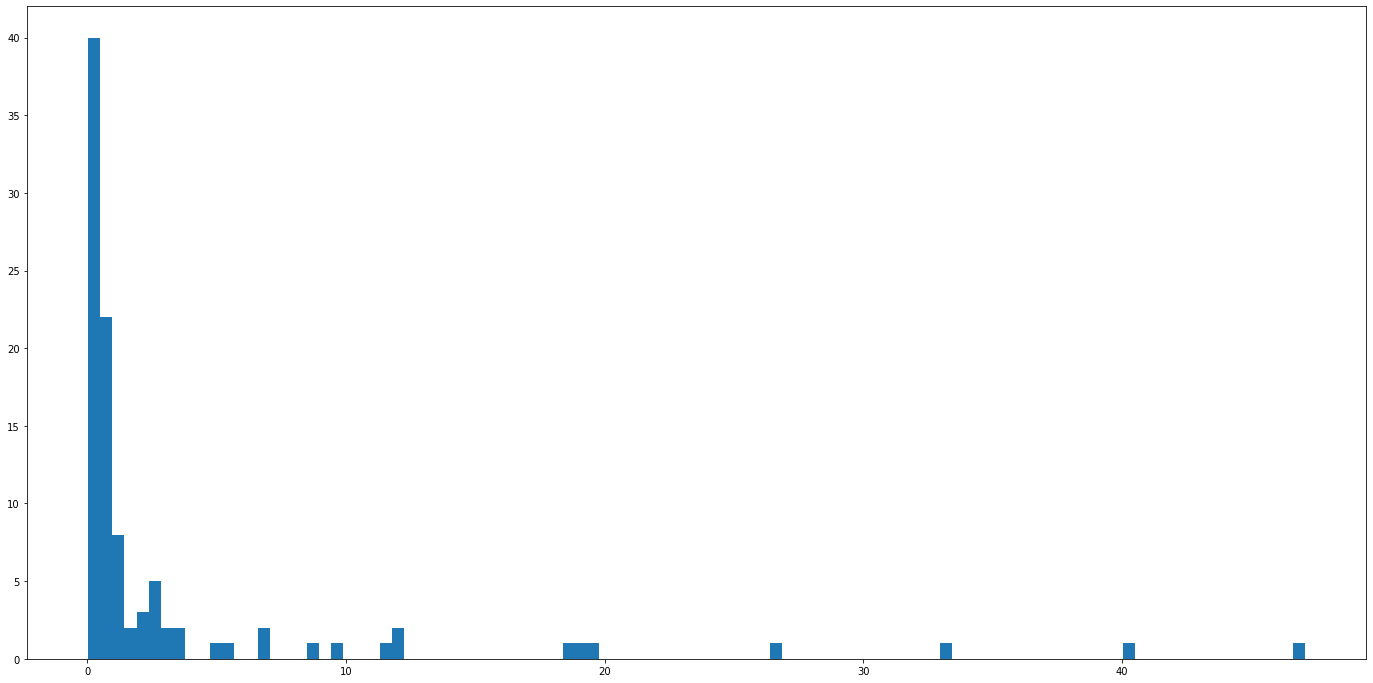

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 100 values from a Pareto distribution
values = np.random.pareto(1, 100)

# Plot the values on a histogram
plt.figure(figsize = (24, 12))
plt.hist(values, bins = 100)
plt.savefig('images/pareto_distribution_example.png', facecolor = 'white')
plt.show()


Let's now try to simulate [this](https://www.youtube.com/watch?v=TcEWRykSgwE) experiment that Dr Jordan B Peterson uses to teach his students about the Pareto principle.

## Experiment setup

There are 100 players and each of them has 100 USD at beginning. Randomly two players are extracted and they bet 1 USD on the flip of a coin. This process is repeted for while and after that we check how much money the players have.

Example:

Player A and Player B get extraced. Player A bet on head and B on tail. Let's suppose the coin toss result in head. Player A wins 1 USD so Player A now has 101 USD and Player B has 99 USD.

![Example](images/example.png)

Example made using [draw.io](https://about.draw.io/)

## Implementation

Libraries importing

In [1]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd


Let's define some useful constants

In [2]:
EPOCH = 1000000
NUM_PLAYERS = 100
STARTING_BUDGET = 100.0
BET_BUDGET = 1.0
PLAYERS_STATUST_FOLDER = "players_status_checkpoints"
LOG_FILENAME = "bet_game_log.txt"
TAX_RATE = 0.5

To represent the players we will use a class containing the unique identifier and money of the player

In [3]:
class Player:
    '''
    Player class
    '''
    def __init__(self, id, money):
        '''
        Constructor of Player objects

        Arguments:
            self: instance of the object
            id: identifier of the player
            money: money of the player

        Returns:
            None
        '''
        self.id = id
        self.money = money

    def update_money(self, new_money):
        '''
        Update the money of the player

        Arguments:
            self: instance of the object
            new_money: new money value

        Returns:
            None
        '''
        self.money = new_money

Let's define some useful functions

In [18]:
def read_players_status(status_name):
    '''
    Read players status

    Arguments:
        status_name: filename with the snapshot of the players status

    Returns:
        players: list of Players
    '''
    players = []

    if os.path.isdir(PLAYERS_STATUST_FOLDER) is True:
        with open(PLAYERS_STATUST_FOLDER + '/' + status_name + '.csv', 'r') as input_file:
            header = input_file.readline()
            for line in input_file.readlines():
                id, money = line.split(',')
                players.append(Player(int(id), float(money)))
    else:
        print('Error: required directory {} not found'.format(PLAYERS_STATUST_FOLDER))
    return players


def print_players_status(players):
    '''
    Print players status

    Arguments:
        players: list of Players

    Returns:
        None
    '''
    for p in players:
        print("{},{}".format(p.id, p.money))


def save_players_status(players, status_name, show_figure = False):
    '''
    Save the players status in a shapshot file

    Arguments:
        players: list of Players
        status_name: filename were to save players status
        show_figure: when True the figures are showen, False otherwise

    Returns:
        None
    '''
    if os.path.isdir(PLAYERS_STATUST_FOLDER) is True:
        pass
    else:
        os.mkdir(PLAYERS_STATUST_FOLDER)

    with open(PLAYERS_STATUST_FOLDER + '/' + status_name + '.csv', 'w') as output_file:
        output_file.write("player,money\n")
        for p in players:
            output_file.write("{},{}\n".format(p.id, p.money))

    ids = []
    moneys = []

    for p in players:
        ids.append(p.id)
        moneys.append(p.money)

    plt.figure(figsize = (24, 12))
    plt.bar(ids, moneys)
    plt.title(status_name.capitalize())
    plt.xlabel('Players')
    plt.ylabel('Moneys')
    plt.savefig(PLAYERS_STATUST_FOLDER + '/' + status_name + '.png', facecolor = 'white')

    if show_figure is True:
        plt.show()
    else:
        pass

    plt.clf()

    ids = []
    moneys = []

    for p in players:
        ids.append(p.id)
        moneys.append(p.money)

    plt.figure(figsize = (24, 12))
    plt.hist(moneys)
    plt.title('Histogram players money')
    #plt.xlabel('Players')
    #plt.ylabel('Moneys')
    plt.savefig(PLAYERS_STATUST_FOLDER + '/' + status_name + '_histogram.png')
    plt.show()
    plt.clf()

    moneys.sort(reverse = True)

    plt.figure(figsize = (24, 12))
    plt.bar(ids, moneys)
    plt.title('Sorted by money descending')
    #plt.xlabel('Players')
    plt.ylabel('Moneys')
    plt.savefig(PLAYERS_STATUST_FOLDER + '/' + status_name + '_sorted.png')
    plt.show()
    plt.clf()
    

def do_betting(players, log_filename, log_filename_mode, start_epoch, end_epoch):
    '''
    Do a cycle of bettings beetwen the players

    Arguments:
        players: list of Players
        log_filename: filename were to save players status
        log_filename_mode: when True the figures are showen, False otherwise
        start_epoch: epoch starting cycle
        end_epoch: epoch ending cycle

    Returns:
        None
    '''
    with open(log_filename, log_filename_mode) as output_file:
        if log_filename_mode == 'w':
            output_file.write("epoch,player_1,player_2,result\n")
        else:
            pass
        
        for i in range(start_epoch, end_epoch):
            player_1 = random.randint(0, NUM_PLAYERS - 1)
            player_2 = random.randint(0, NUM_PLAYERS - 1)

            if player_1 == player_2:
                output_file.write("{},{},{},Same player. No bet\n".format(i, player_1, player_2))
            else:
                if players[player_1].money > 0:
                    if players[player_2].money > 0:
                        flip = random.randint(0, 1)

                        # To avoiding losing decimals let's take the min between 1 USD and the money of the betting players
                        bet_budget = min(BET_BUDGET, players[player_1].money, players[player_2].money)

                        if flip == 0:
                            players[player_1].update_money(players[player_1].money + bet_budget)
                            players[player_2].update_money(players[player_2].money - bet_budget)

                            output_file.write("{0},{1},{2},Player {1} wins bet. Now player {1} has {3} and player {2} has {4}\n".format(i, player_1, player_2, players[player_1].money, players[player_2].money))
                        else:
                            players[player_1].update_money(players[player_1].money - bet_budget)
                            players[player_2].update_money(players[player_2].money + bet_budget)

                            output_file.write("{0},{1},{2},Player {2} wins bet. Now player {1} has {3} and player {2} has {4}\n".format(i,player_1, player_2, players[player_1].money, players[player_2].money))
                    else:
                        output_file.write("{0},{1},{2},Player {2} has {3} money. No bet\n".format(i, player_1, player_2, players[player_2].money))
                else:
                    output_file.write("{0},{1},{2},Player {1} has {3} money. No bet\n".format(i, player_1, player_2, players[player_1].money))


def count_broke_players(players):
    '''
    Return the count of broke of players

    Arguments:
        players: list of Players

    Returns:
        count_broke_players: count of broke players
    '''
    ids = []
    moneys = []

    for p in players:
        ids.append(p.id)
        moneys.append(p.money)

    return moneys.count(0)


def get_median_money_players(players):
    '''
    Return the median of the money of players

    Arguments:
        players: list of Players

    Returns:
        median: median of the money of players
    '''
    ids = []
    moneys = []

    for p in players:
        ids.append(p.id)
        moneys.append(p.money)

    return np.median(moneys)


def print_metrics(players):
    '''
    Print some metrics about the players

    Arguments:
        players: list of Players

    Returns:
        None
    '''
    ids = []
    moneys = []

    for p in players:
        ids.append(p.id)
        moneys.append(p.money)

    print('Max: {}'.format(np.max(moneys)))
    print('Min: {}'.format(np.min(moneys)))
    print('Average: {}'.format(np.average(moneys)))
    print('Median: {}'.format(np.median(moneys)))
    print('Q1 quantile: {}'.format(np.quantile(moneys, 0.25)))
    print('Q2 quantile: {}'.format(np.quantile(moneys, 0.50)))
    print('Q3 quantile: {}'.format(np.quantile(moneys, 0.75)))
    print('Count broke players: {}'.format(count_broke_players(players)))

Now we will initialize the players for our game

In [80]:
players = []

In [81]:
for i in range(NUM_PLAYERS):
    players.append(Player(i, STARTING_BUDGET))  

Let's save a check point at the beginning

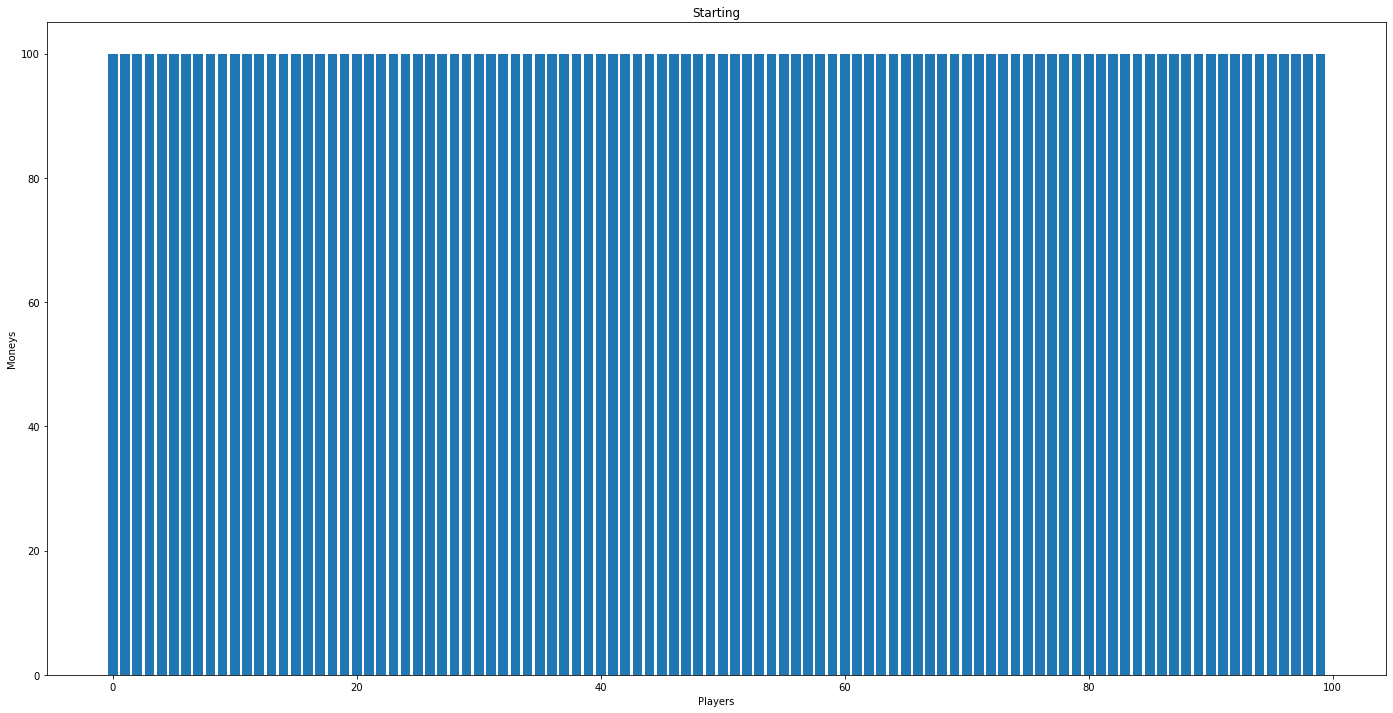

<Figure size 432x288 with 0 Axes>

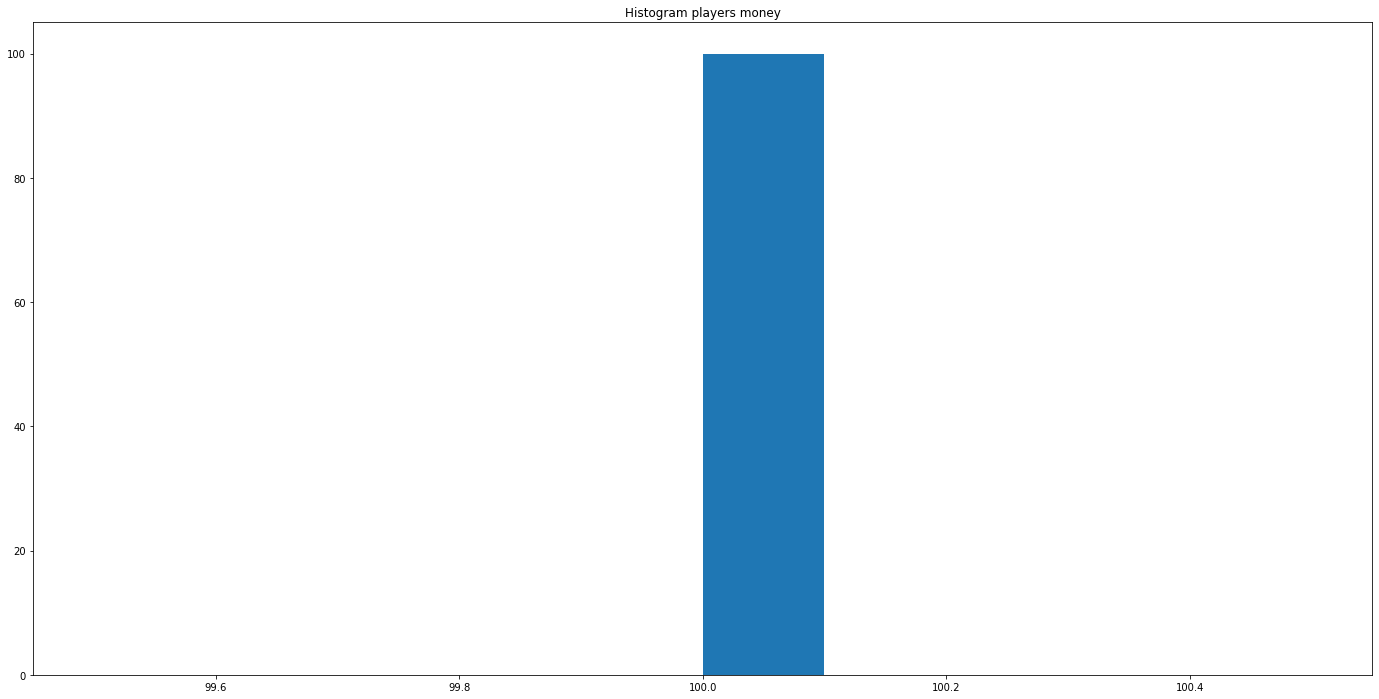

<Figure size 432x288 with 0 Axes>

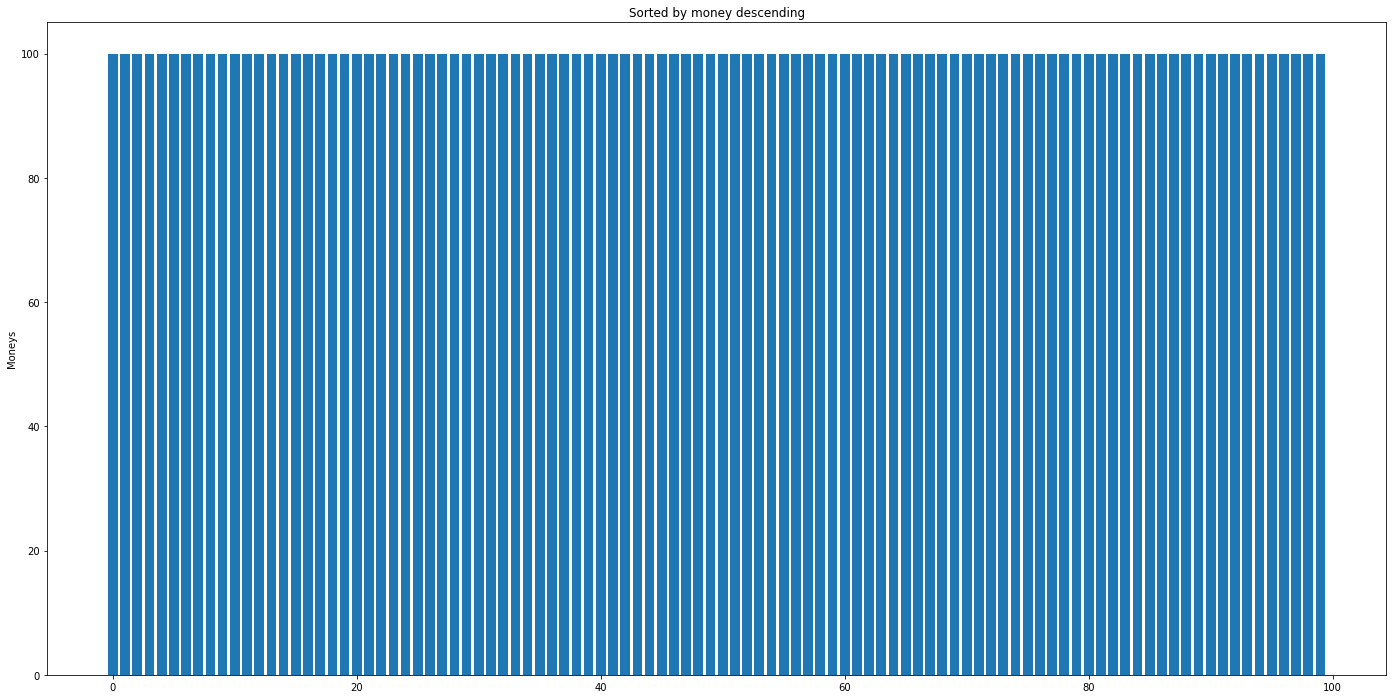

<Figure size 432x288 with 0 Axes>

In [82]:
save_players_status(players, 'starting', True)

Now let's run the betting cycle for a while and then save a checkpoint of the players status

In [83]:
do_betting(players, LOG_FILENAME, "w", 0, EPOCH)

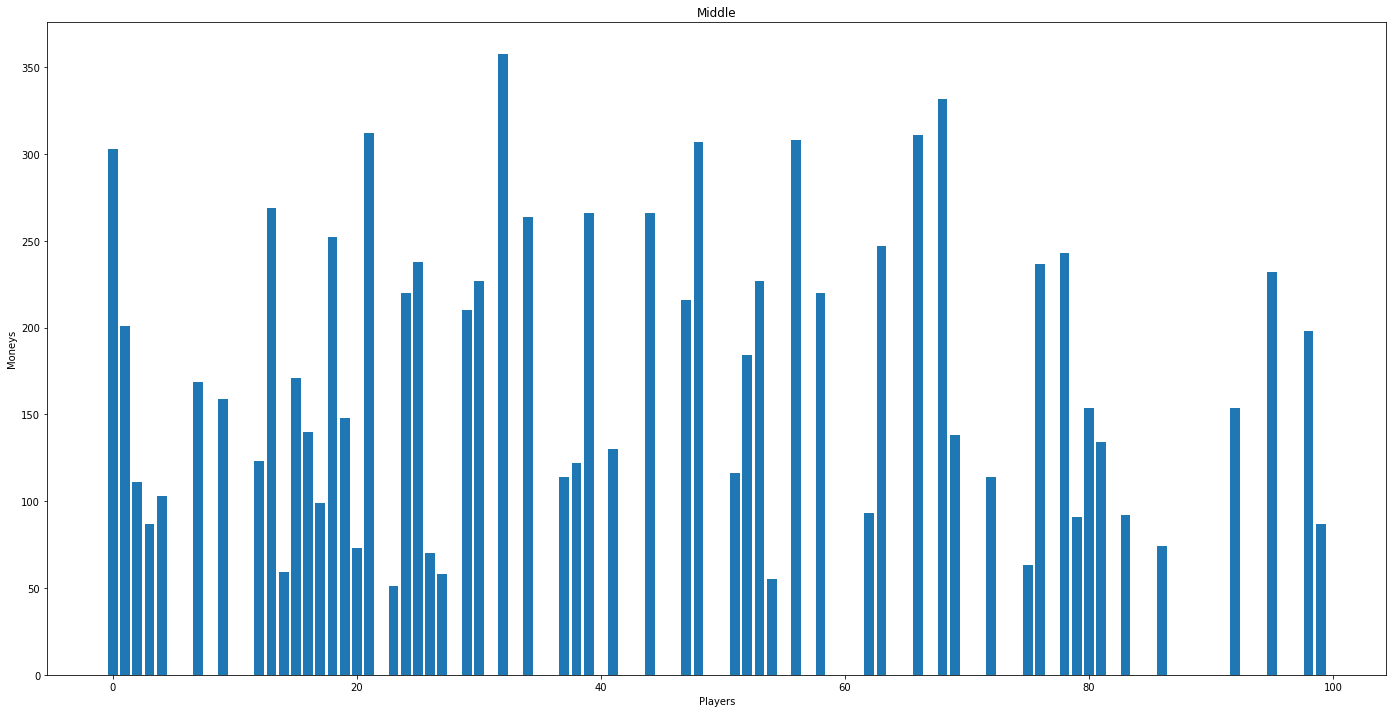

<Figure size 432x288 with 0 Axes>

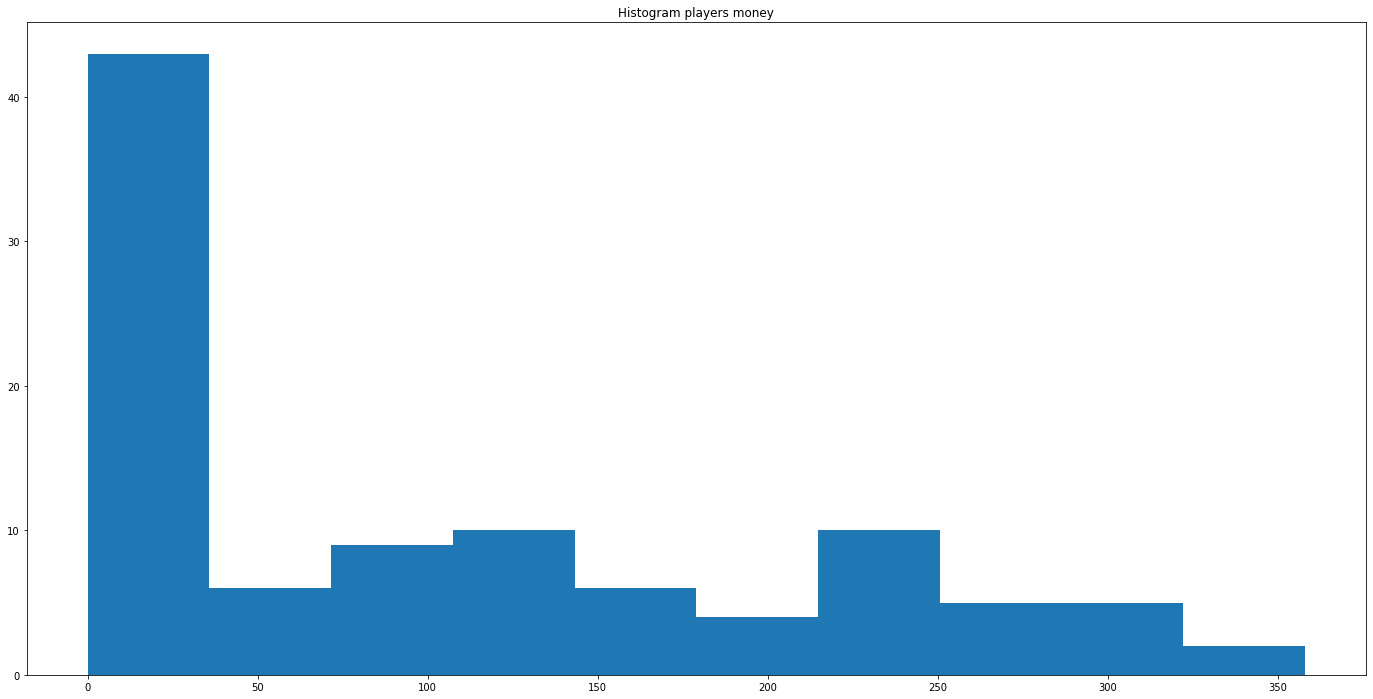

<Figure size 432x288 with 0 Axes>

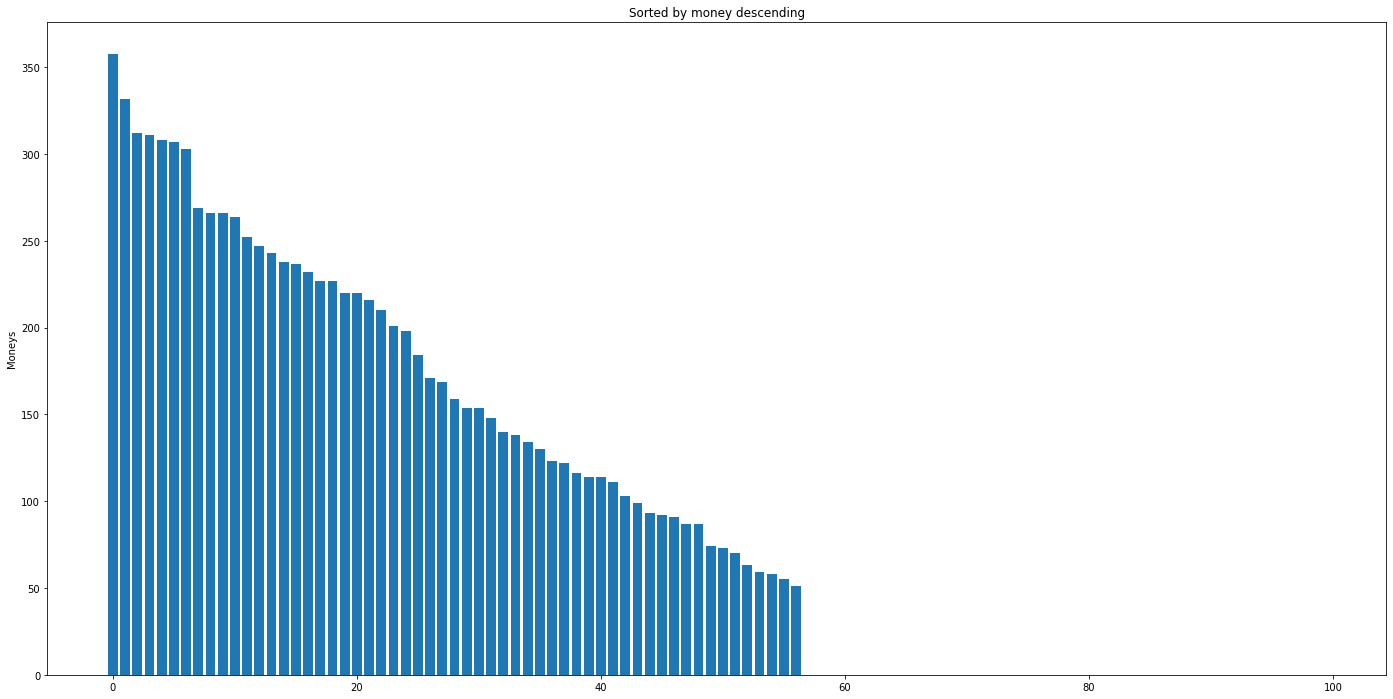

<Figure size 432x288 with 0 Axes>

In [84]:
save_players_status(players, 'middle', True)

By printing the metrics we can have an overall understanding of the players status

In [85]:
print_metrics(players)

Max: 358.0
Min: 0.0
Average: 100.0
Median: 73.5
Q1 quantile: 0.0
Q2 quantile: 73.5
Q3 quantile: 187.5
Count broke players: 43


Let's save the broke players to track them in the future

In [20]:
first_time_broke_players = []

for p in players:
    if p.money == 0.0:
        first_time_broke_players.append(p.id)
    else:
       pass

print(len(first_time_broke_players))

43


In [23]:
print(first_time_broke_players)

[5, 6, 8, 10, 11, 22, 28, 31, 33, 35, 36, 40, 42, 43, 45, 46, 49, 50, 55, 57, 59, 60, 61, 64, 65, 67, 70, 71, 73, 74, 77, 82, 84, 85, 87, 88, 89, 90, 91, 93, 94, 96, 97]


Let's tax the rich players and give money to the broke players and do another betting cycle

In [86]:
taxes_threshold = get_median_money_players(players)
collected_taxes = 0

for p in players:
    if p.money > taxes_threshold:
        taxes = p.money * TAX_RATE
        p.update_money(p.money - taxes)
        collected_taxes = collected_taxes + taxes
    else:
        pass

print('Collected taxes: {}'.format(collected_taxes))

Collected taxes: 4785.5


In [87]:
welfare_check = collected_taxes / count_broke_players(players)

print('Welfare check: {}'.format(welfare_check))

for p in players:
    if p.money == 0:
        p.update_money(welfare_check)
    else:
        pass

Welfare check: 111.29069767441861


In [88]:
with open(LOG_FILENAME, "a") as output_file:
    output_file.write("{},,,Taxes application\n".format(EPOCH))

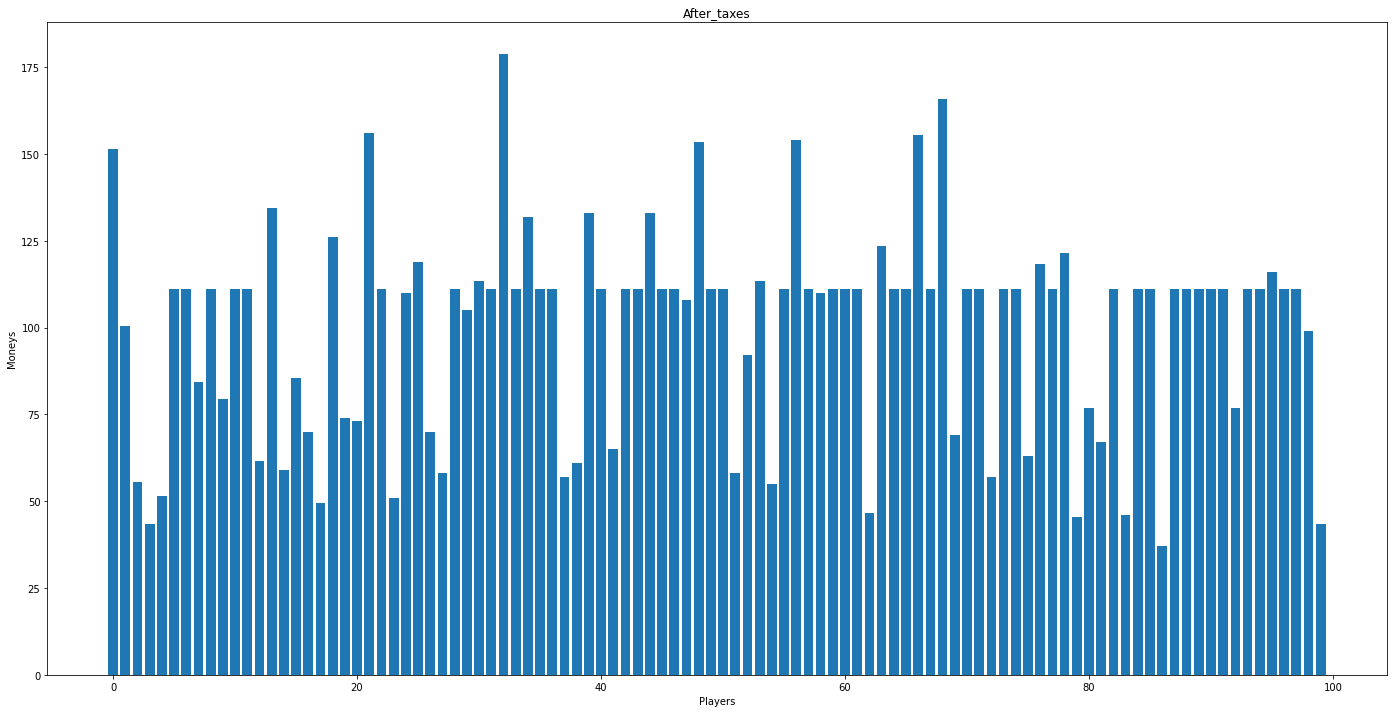

<Figure size 432x288 with 0 Axes>

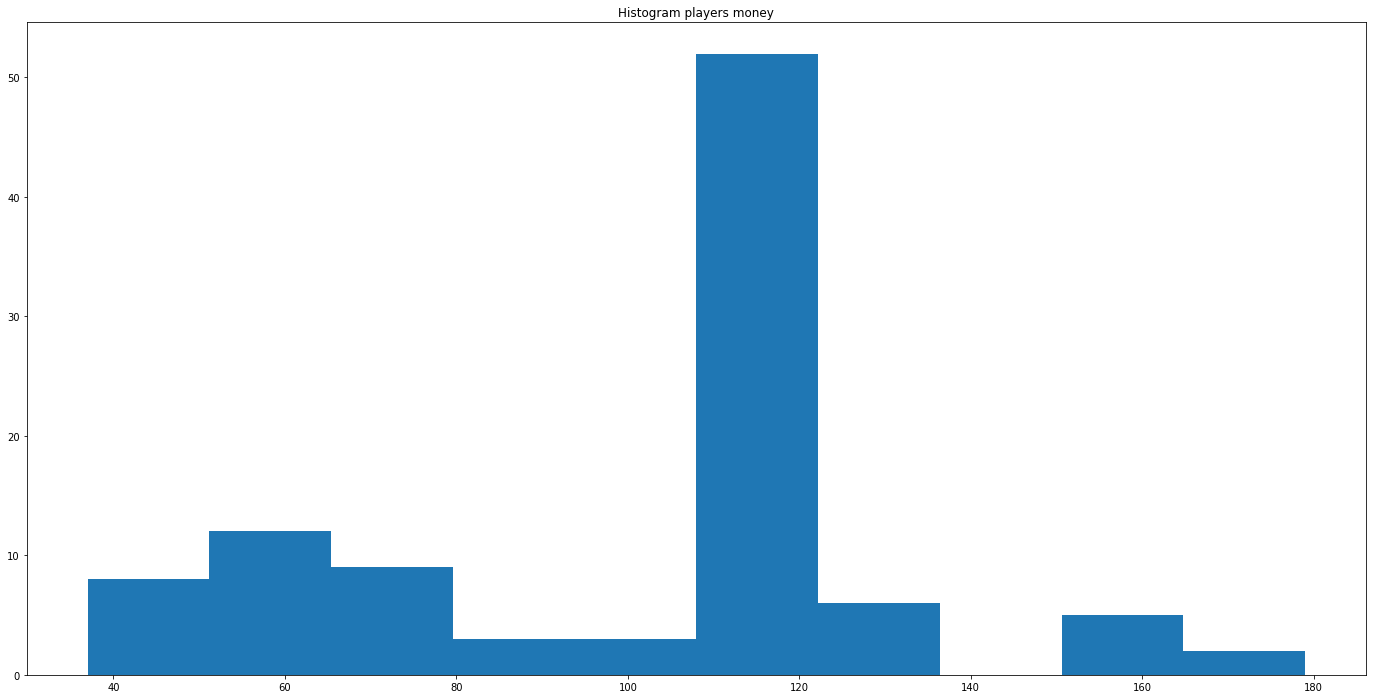

<Figure size 432x288 with 0 Axes>

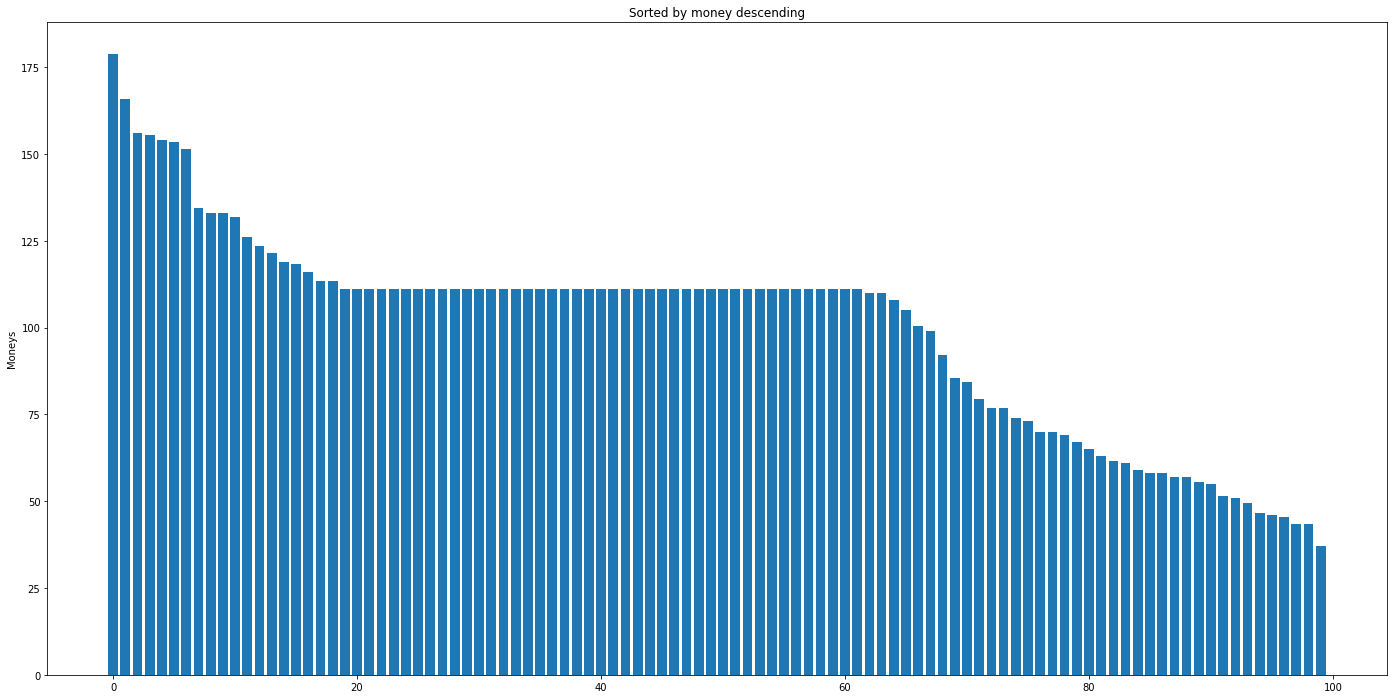

<Figure size 432x288 with 0 Axes>

In [89]:
save_players_status(players, 'after_taxes', True)

In [90]:
print_metrics(players)

Max: 179.0
Min: 37.0
Average: 100.0
Median: 111.29069767441861
Q1 quantile: 73.75
Q2 quantile: 111.29069767441861
Q3 quantile: 111.29069767441861
Count broke players: 0


In [91]:
do_betting(players, LOG_FILENAME, "a", EPOCH + 1, EPOCH * 2)

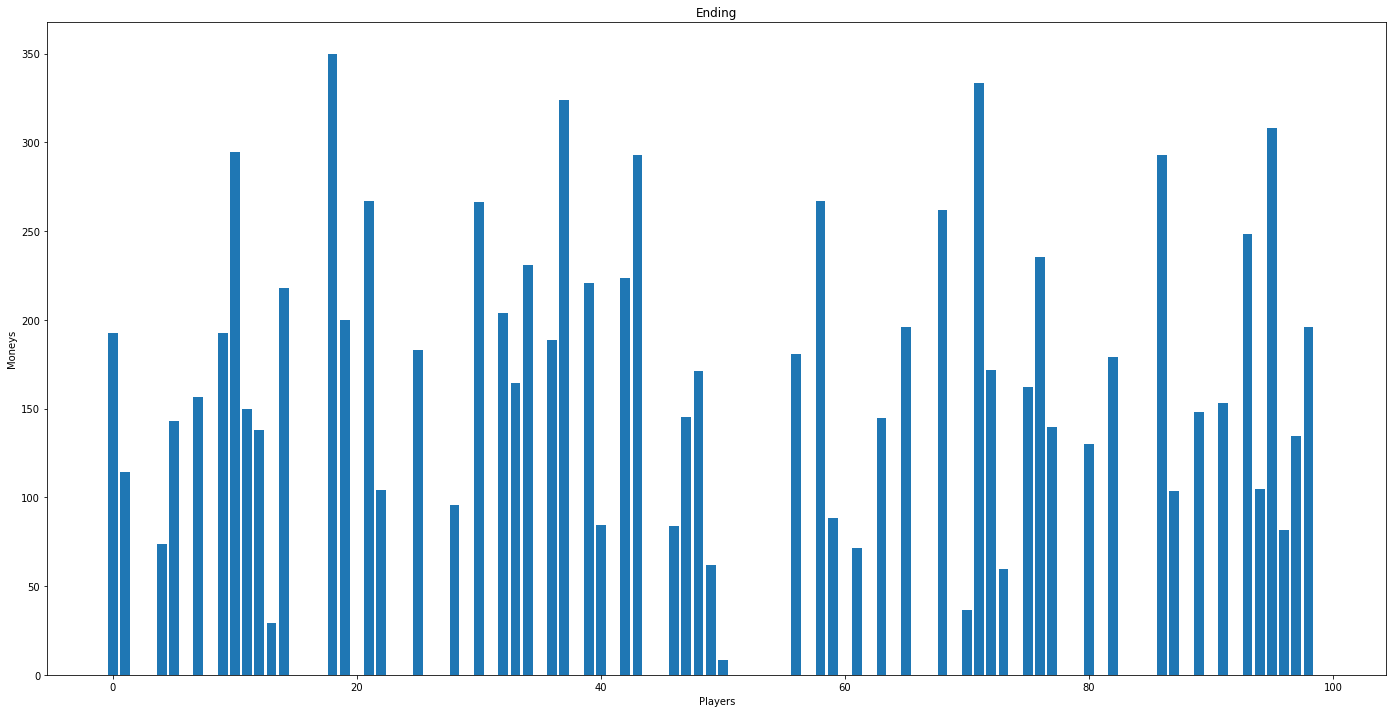

<Figure size 432x288 with 0 Axes>

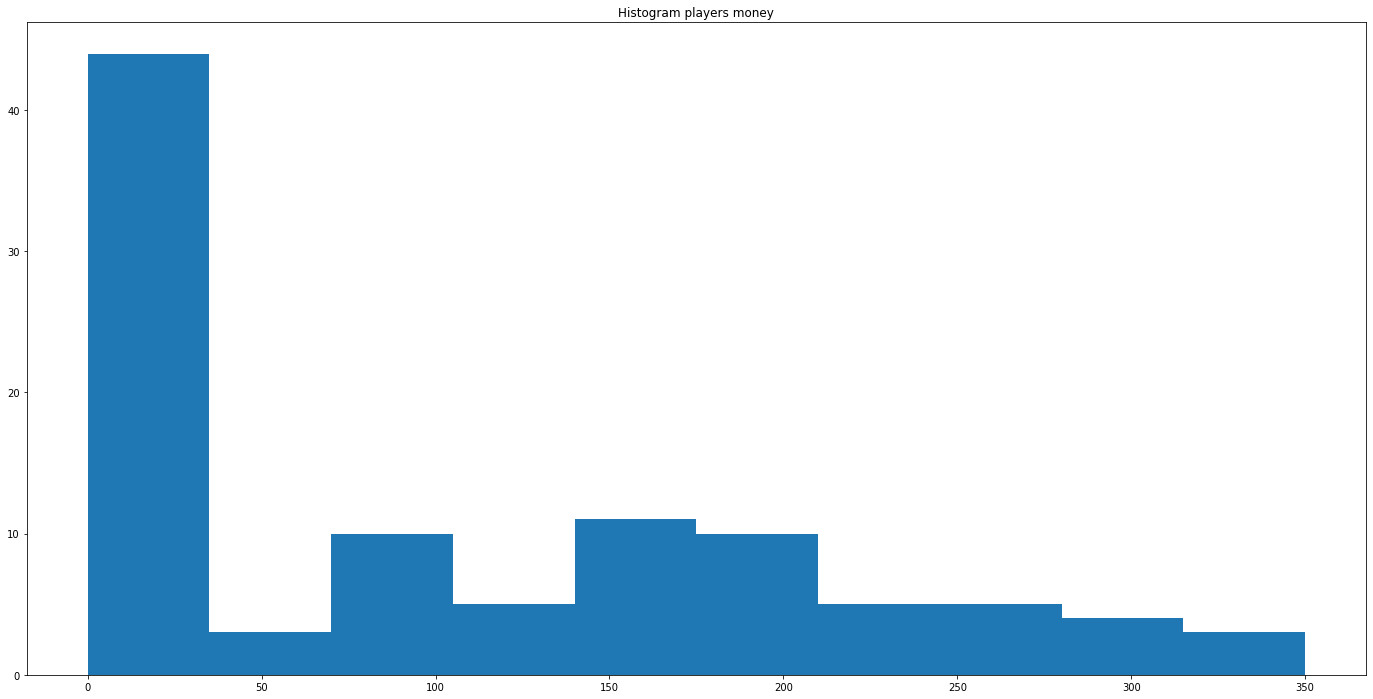

<Figure size 432x288 with 0 Axes>

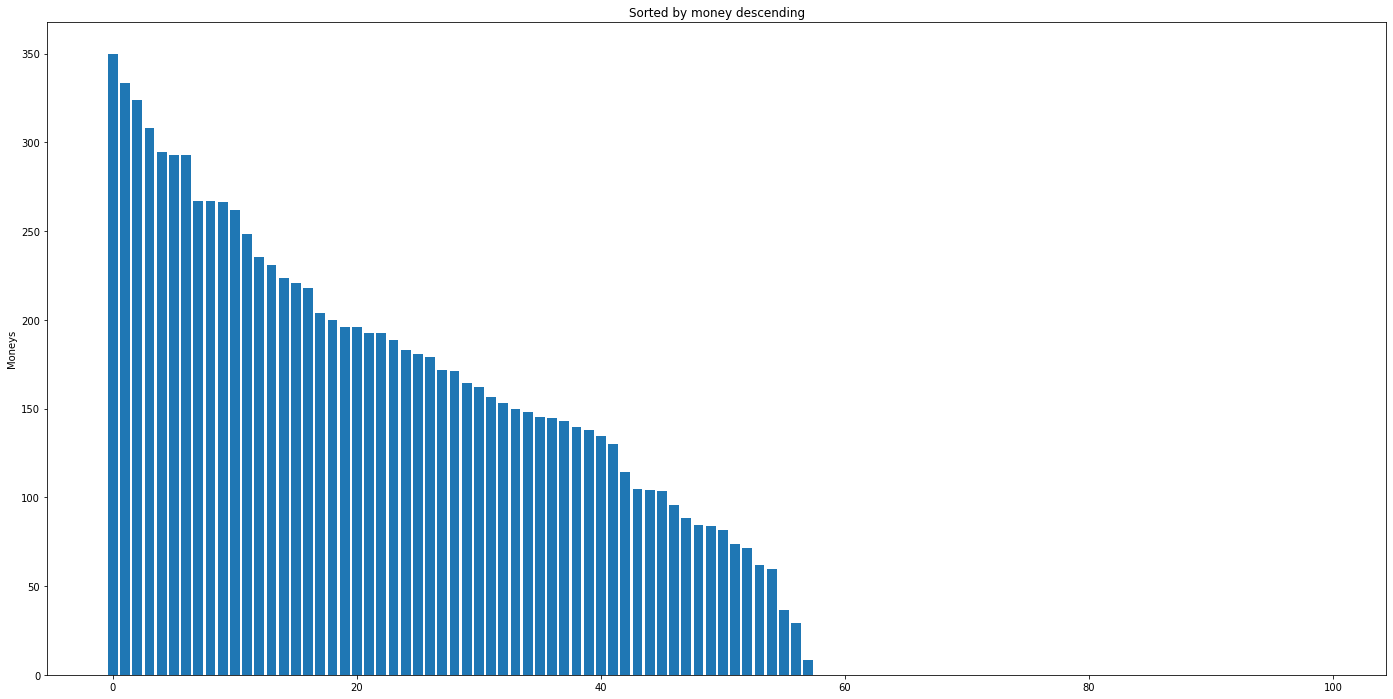

<Figure size 432x288 with 0 Axes>

In [92]:
save_players_status(players, 'ending', True)

In [93]:
print_metrics(players)

Max: 350.0
Min: 0.0
Average: 100.0
Median: 82.6860465116279
Q1 quantile: 0.0
Q2 quantile: 82.6860465116279
Q3 quantile: 181.44767441860466
Count broke players: 42


The players that are broke again are:

In [25]:

second_time_broke_players = []

for p in players:
    if p.money == 0:
        second_time_broke_players.append(p.id)
    else:
        pass

print(len(second_time_broke_players))

42


In [26]:
again_broke_players = []

for player_id in second_time_broke_players:
    if player_id in first_time_broke_players:
        again_broke_players.append(player_id)
    else:
        pass

print(len(again_broke_players))

15


In [27]:
print(again_broke_players)

[6, 8, 31, 35, 45, 55, 57, 60, 64, 67, 74, 84, 85, 88, 90]


Let's check the evolution of every palyer moneys

In [94]:
df_starting = pd.read_csv(PLAYERS_STATUST_FOLDER + '/' + 'starting.csv', index_col = 'player')
df_middle = pd.read_csv(PLAYERS_STATUST_FOLDER + '/' + 'middle.csv', index_col = 'player')
df_after_taxes = pd.read_csv(PLAYERS_STATUST_FOLDER + '/' + 'after_taxes.csv', index_col = 'player')
df_ending = pd.read_csv(PLAYERS_STATUST_FOLDER + '/' + 'ending.csv', index_col = 'player')


In [95]:
df_starting.head()

,money
player,
0,100.0
1,100.0
2,100.0
3,100.0
4,100.0


In [96]:
#df_starting.columns = ['money_starting']
df_join = df_starting.join(df_middle, rsuffix = '_middle')
df_join = df_join.join(df_after_taxes, rsuffix = '_after_taxes')
df_join = df_join.join(df_ending, rsuffix = '_ending')
df_join.columns = ['money_starting', 'money_middle', 'money_after_taxes', 'money_ending']

df_join.head()

,money_starting,money_middle,money_after_taxes,money_ending
player,,,,
0,100.0,303.0,151.5,192.5
1,100.0,201.0,100.5,114.5
2,100.0,111.0,55.5,0.0
3,100.0,87.0,43.5,0.0
4,100.0,103.0,51.5,73.5


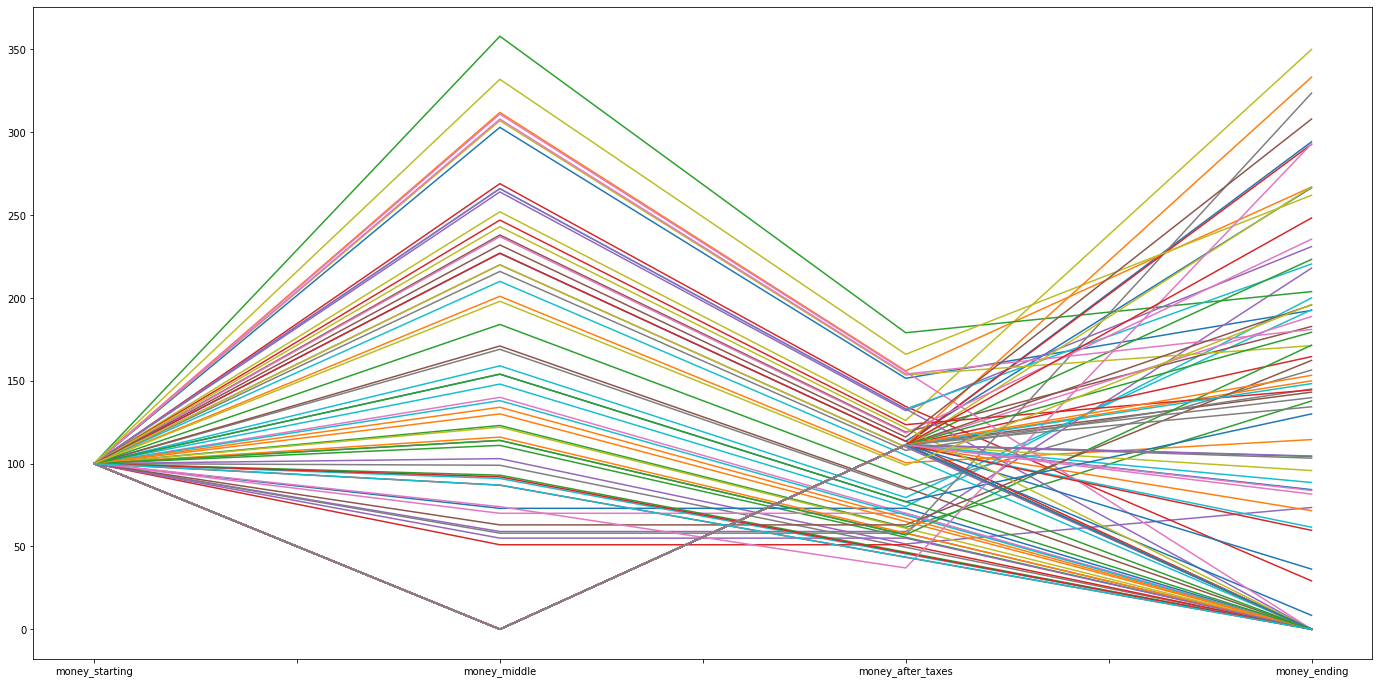

In [97]:
df_transpose = df_join.transpose()
plot = df_transpose.plot(legend = False, figsize = (24, 12))

fig = plot.get_figure()
fig.savefig('images/money_trend.png', facecolor = "white")

We could also take a sample inside the betting cycle to have a more accuarate rappresentation of the evolution of the money of the players